# Reimplementing the comparison of two losses: cross entropy and mean squared error

Attempt to reimplement the losses and obtain the same figure as Glorot and Bengio.

Source: Glorot and Bengio, _Understanding the difficulty of training deep feedforward neural networks_, Sect. 4.1, Fig. 5, Proceedings of the 13th International Conference on Artificial Intelligence and Statistics (AISTATS) 2010, Chia Laguna Resort, Sardinia, Italy. Volume 9 of JMLR: W&CP 9


https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf


In [1]:
import torch
import torch.nn as nn

In [2]:
model = nn.Sequential(
    nn.Linear(1, 1, bias=False),
    nn.Tanh(),
    nn.Linear(1, 1, bias=False),
    nn.Tanh(),
    nn.Sigmoid()
)

In [3]:
model

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=False)
  (1): Tanh()
  (2): Linear(in_features=1, out_features=1, bias=False)
  (3): Tanh()
  (4): Sigmoid()
)

In [4]:
model.state_dict()

OrderedDict([('0.weight', tensor([[-0.6779]])),
             ('2.weight', tensor([[-0.3679]]))])

In [5]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.6779]], requires_grad=True),
 Parameter containing:
 tensor([[-0.3679]], requires_grad=True)]

In [6]:
def set_weights(model, w1, w2):
    (w1, w2) = torch.FloatTensor([w1, w2])
    model[0].weight = nn.Parameter(torch.Tensor([[w1]]))
    model[2].weight = nn.Parameter(torch.Tensor([[w2]]))
    return model

In [7]:
set_weights(model, 4.0, 4.0)

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=False)
  (1): Tanh()
  (2): Linear(in_features=1, out_features=1, bias=False)
  (3): Tanh()
  (4): Sigmoid()
)

In [8]:
model.state_dict()

OrderedDict([('0.weight', tensor([[4.]])), ('2.weight', tensor([[4.]]))])

## Results with PyTorch Definitions

In [9]:
loss_fn_bce = torch.nn.BCELoss()
loss_fn_mse = torch.nn.MSELoss()

In [10]:
TRIALS = 10000

In [11]:
ce_l = []
mse_l = []
x_l = torch.linspace(-4, 4, 100)
y_l = torch.linspace(-4, 4, 100)
for w1, w2 in [(w1, w2) for w1 in x_l for w2 in y_l]:
    model = set_weights(model, w1, w2)
    input = torch.unsqueeze(torch.rand(TRIALS), dim=1)
    output = model(input)
    target = torch.unsqueeze(torch.rand(TRIALS), dim=1)
    ce, mse = loss_fn_bce(output, target), loss_fn_mse(output, target)
    ce_l += [ce]
    mse_l += [mse]

x_l = x_l.numpy()
y_l = y_l.numpy()
ce_l = torch.tensor(ce_l).numpy()
mse_l = torch.tensor(mse_l).numpy()

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [13]:
def plot(fig, ax, X, Y, Z, color):
    # ax.view_init(azim=210)
    X, Y = np.meshgrid(X, Y)
    Z = Z.reshape(X.shape)
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=color,
                           linewidth=0, antialiased=False)
    fig.colorbar(surf, shrink=0.5, aspect=5)

In [14]:
def plot_descent(X, Y, Z1, Z2):
    fig = plt.figure()
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)
    plot(fig, ax, X, Y, Z1, plt.cm.coolwarm)
    plot(fig, ax, X, Y, Z2, plt.cm.rainbow)

    plt.show()

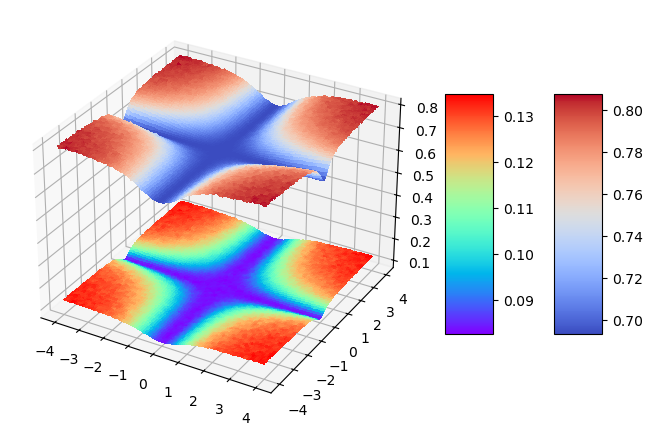

In [15]:
plot_descent(x_l, y_l, ce_l, mse_l)